In [ ]:
import pandas as pd

df = pd.read_csv('/content/student-mat.csv', sep=';')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Check for missing values
na_valuess = df.isnull().sum().sum()
print(na_valuess)  # Should return 0 since this dataset is clean, but there's no harm in checking


0


In [ ]:
# Define bins and labels
bins = [0, 9, 13, 20]
labels = ['Low', 'Medium', 'High']
df['performance'] = pd.cut(df['G3'], bins=bins, labels=labels, right=True, include_lowest=True)

# Check the distribution
df['performance'].value_counts()


,count
performance,
Medium,165
Low,130
High,100


In [ ]:
# Check for missing values
na_valuess = df.isna().sum().sum()
print(na_valuess)  # Should return 0 since this dataset is clean, but there's no harm in checking


0


In [ ]:
df.shape

(395, 34)

In [ ]:
df['reason'].value_counts()

,count
reason,
course,145
home,109
reputation,105
other,36


In [ ]:
# Copy of original DataFrame to avoid modifying raw data
df_processed = df.copy()

# Map binary yes/no fields to 1/0
binary_map = {'yes': 1, 'no': 0}
df_processed['schoolsup'] = df_processed['schoolsup'].map(binary_map)
df_processed['famsup'] = df_processed['famsup'].map(binary_map)
df_processed['paid'] = df_processed['paid'].map(binary_map)
df_processed['activities'] = df_processed['activities'].map(binary_map)
df_processed['nursery'] = df_processed['nursery'].map(binary_map)
df_processed['higher'] = df_processed['higher'].map(binary_map)
df_processed['internet'] = df_processed['internet'].map(binary_map)
df_processed['romantic'] = df_processed['romantic'].map(binary_map)

# Map other columns manually
df_processed['sex'] = df_processed['sex'].map({'M': 1, 'F': 0})
df_processed['address'] = df_processed['address'].map({'U': 1, 'R': 0})
df_processed['school'] = df_processed['school'].map({'GP': 1, 'MS': 0})
df_processed['famsize'] = df_processed['famsize'].map({'GT3': 1, 'LE3': 0})
df_processed['Pstatus'] = df_processed['Pstatus'].map({'T': 1, 'A': 0})

# One-hot encode nominal categorical variables
multi_cat_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
df_processed = pd.get_dummies(df_processed, columns=multi_cat_cols, drop_first=True)

# Drop G1, G2, G3
df_processed = df_processed.drop(columns=['G3'])

# Convert target (G3) to performance labels
bins = [0, 9, 13, 20]
labels = ['Low', 'Medium', 'High']
df_processed['performance'] = pd.cut(df['G3'], bins=bins, labels=labels, right=True, include_lowest=True)

# Convert boolean to integer if any remain (e.g., after dummy encoding)
df_processed = df_processed.astype(int, errors='ignore')

# Confirm all features are numeric
print(df_processed.dtypes.value_counts())


int64       41
category     1
Name: count, dtype: int64


In [ ]:
# Drop columns that were replaced via mapping or encoding
drop_cols = ['Mjob', 'Fjob', 'reason', 'guardian']  # original column, now binary

# Drop only if still in the DataFrame
df_processed = df_processed.drop(columns=[col for col in drop_cols if col in df_processed.columns])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   school       395 non-null    object  
 1   sex          395 non-null    object  
 2   age          395 non-null    int64   
 3   address      395 non-null    object  
 4   famsize      395 non-null    object  
 5   Pstatus      395 non-null    object  
 6   Medu         395 non-null    int64   
 7   Fedu         395 non-null    int64   
 8   Mjob         395 non-null    object  
 9   Fjob         395 non-null    object  
 10  reason       395 non-null    object  
 11  guardian     395 non-null    object  
 12  traveltime   395 non-null    int64   
 13  studytime    395 non-null    int64   
 14  failures     395 non-null    int64   
 15  schoolsup    395 non-null    object  
 16  famsup       395 non-null    object  
 17  paid         395 non-null    object  
 18  activities   395 non-null    o

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   school             395 non-null    int64   
 1   sex                395 non-null    int64   
 2   age                395 non-null    int64   
 3   address            395 non-null    int64   
 4   famsize            395 non-null    int64   
 5   Pstatus            395 non-null    int64   
 6   Medu               395 non-null    int64   
 7   Fedu               395 non-null    int64   
 8   traveltime         395 non-null    int64   
 9   studytime          395 non-null    int64   
 10  failures           395 non-null    int64   
 11  schoolsup          395 non-null    int64   
 12  famsup             395 non-null    int64   
 13  paid               395 non-null    int64   
 14  activities         395 non-null    int64   
 15  nursery            395 non-null    int64   
 16  higher  

In [ ]:
df_processed['performance'].value_counts()

,count
performance,
Medium,165
Low,130
High,100


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_processed.drop(columns=['performance'])
y = df_processed['performance']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # Ensures each class is proportionally represented
    random_state=42
)

# Check shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (316, 41)
X_test: (79, 41)
y_train: (316,)
y_test: (79,)


In [ ]:
#tune the random forest model
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_params,
                       cv=3,
                       scoring='f1_macro',
                       n_jobs=-1)

rf_grid.fit(X_train, y_train)
print("Best Random Forest Params:", rf_grid.best_params_)


Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
#tune the gradient boosting model
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42),
                       gb_params,
                       cv=3,
                       scoring='f1_macro',
                       n_jobs=-1)

gb_grid.fit(X_train, y_train)
print("Best Gradient Boosting Params:", gb_grid.best_params_)


Best Gradient Boosting Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
# Use best estimators from grid search
best_rf = rf_grid.best_estimator_
best_gb = gb_grid.best_estimator_

# Plug them into the hybrid model
hybrid_model = VotingClassifier(
    estimators=[('rf', best_rf), ('gb', best_gb)],
    voting='soft'
)

# Train the hybrid model
hybrid_model.fit(X_train, y_train)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         random_state=42))],
                 voting='soft')

Accuracy: 88.61 %

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.95      0.97        20
         Low       0.88      0.81      0.84        26
      Medium       0.83      0.91      0.87        33

    accuracy                           0.89        79
   macro avg       0.90      0.89      0.89        79
weighted avg       0.89      0.89      0.89        79



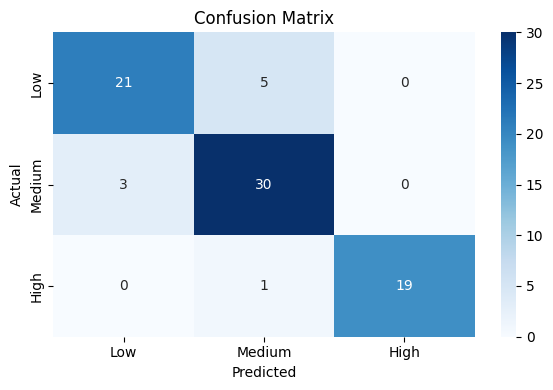

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = hybrid_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'Medium', 'High'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'], cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


see the accuracy across different student groups

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Split test set by sex
X_test_female = X_test[X_test['sex'] == 0]
y_test_female = y_test[X_test_female.index]

X_test_male = X_test[X_test['sex'] == 1]
y_test_male = y_test[X_test_male.index]

# Predict for both groups
y_pred_female = hybrid_model.predict(X_test_female)
y_pred_male = hybrid_model.predict(X_test_male)

# Evaluate each group
print("Female Students Performance:")
print("Accuracy:", round(accuracy_score(y_test_female, y_pred_female) * 100, 2), "%")
print(classification_report(y_test_female, y_pred_female))

print("\nMale Students Performance:")
print("Accuracy:", round(accuracy_score(y_test_male, y_pred_male) * 100, 2), "%")
print(classification_report(y_test_male, y_pred_male))


Female Students Performance:
Accuracy: 86.67 %
              precision    recall  f1-score   support

        High       1.00      0.92      0.96        13
         Low       0.86      0.80      0.83        15
      Medium       0.79      0.88      0.83        17

    accuracy                           0.87        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45


Male Students Performance:
Accuracy: 91.18 %
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       0.90      0.82      0.86        11
      Medium       0.88      0.94      0.91        16

    accuracy                           0.91        34
   macro avg       0.93      0.92      0.92        34
weighted avg       0.91      0.91      0.91        34



In [ ]:
# Split test set by internet access
X_test_net = X_test[X_test['internet'] == 1]
y_test_net = y_test[X_test_net.index]

X_test_no_net = X_test[X_test['internet'] == 0]
y_test_no_net = y_test[X_test_no_net.index]

# Predict for both groups
y_pred_net = hybrid_model.predict(X_test_net)
y_pred_no_net = hybrid_model.predict(X_test_no_net)

# Evaluate each group
print("Students with Internet:")
print("Accuracy:", round(accuracy_score(y_test_net, y_pred_net) * 100, 2), "%")
print(classification_report(y_test_net, y_pred_net))

print("\nStudents without Internet:")
print("Accuracy:", round(accuracy_score(y_test_no_net, y_pred_no_net) * 100, 2), "%")
print(classification_report(y_test_no_net, y_pred_no_net))


Students with Internet:
Accuracy: 90.91 %
              precision    recall  f1-score   support

        High       1.00      0.94      0.97        18
         Low       0.89      0.85      0.87        20
      Medium       0.87      0.93      0.90        28

    accuracy                           0.91        66
   macro avg       0.92      0.91      0.91        66
weighted avg       0.91      0.91      0.91        66


Students without Internet:
Accuracy: 76.92 %
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         2
         Low       0.80      0.67      0.73         6
      Medium       0.67      0.80      0.73         5

    accuracy                           0.77        13
   macro avg       0.82      0.82      0.82        13
weighted avg       0.78      0.77      0.77        13



In [ ]:
# Split test set by family support
X_test_famsup = X_test[X_test['famsup'] == 1]
y_test_famsup = y_test[X_test_famsup.index]

X_test_no_famsup = X_test[X_test['famsup'] == 0]
y_test_no_famsup = y_test[X_test_no_famsup.index]

# Predict for both groups
y_pred_famsup = hybrid_model.predict(X_test_famsup)
y_pred_no_famsup = hybrid_model.predict(X_test_no_famsup)

# Evaluate each group
print("Students with Family Support:")
print("Accuracy:", round(accuracy_score(y_test_famsup, y_pred_famsup) * 100, 2), "%")
print(classification_report(y_test_famsup, y_pred_famsup))

print("\nStudents without Family Support:")
print("Accuracy:", round(accuracy_score(y_test_no_famsup, y_pred_no_famsup) * 100, 2), "%")
print(classification_report(y_test_no_famsup, y_pred_no_famsup))


Students with Family Support:
Accuracy: 90.0 %
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        13
         Low       0.94      0.79      0.86        19
      Medium       0.81      0.94      0.87        18

    accuracy                           0.90        50
   macro avg       0.92      0.91      0.91        50
weighted avg       0.91      0.90      0.90        50


Students without Family Support:
Accuracy: 86.21 %
              precision    recall  f1-score   support

        High       1.00      0.86      0.92         7
         Low       0.75      0.86      0.80         7
      Medium       0.87      0.87      0.87        15

    accuracy                           0.86        29
   macro avg       0.87      0.86      0.86        29
weighted avg       0.87      0.86      0.86        29



In [ ]:
# Define thresholds
X_test_med_low = X_test[X_test['Medu'] <= 2]
y_test_med_low = y_test[X_test_med_low.index]

X_test_med_high = X_test[X_test['Medu'] >= 3]
y_test_med_high = y_test[X_test_med_high.index]

# Predict
y_pred_med_low = hybrid_model.predict(X_test_med_low)
y_pred_med_high = hybrid_model.predict(X_test_med_high)

# Evaluate
print("Students with low Maternal Education (Medu ≤ 2):")
print("Accuracy:", round(accuracy_score(y_test_med_low, y_pred_med_low) * 100, 2), "%")
print(classification_report(y_test_med_low, y_pred_med_low))

print("\nStudents with low Maternal Education (Medu ≥ 3):")
print("Accuracy:", round(accuracy_score(y_test_med_high, y_pred_med_high) * 100, 2), "%")
print(classification_report(y_test_med_high, y_pred_med_high))


Students with low Maternal Education (Medu ≤ 2):
Accuracy: 83.78 %
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         5
         Low       0.88      0.78      0.82        18
      Medium       0.75      0.86      0.80        14

    accuracy                           0.84        37
   macro avg       0.88      0.88      0.87        37
weighted avg       0.84      0.84      0.84        37


Students with low Maternal Education (Medu ≥ 3):
Accuracy: 92.86 %
              precision    recall  f1-score   support

        High       1.00      0.93      0.97        15
         Low       0.88      0.88      0.88         8
      Medium       0.90      0.95      0.92        19

    accuracy                           0.93        42
   macro avg       0.92      0.92      0.92        42
weighted avg       0.93      0.93      0.93        42



In [ ]:
# Split test set by father's education
X_test_fed_low = X_test[X_test['Fedu'] <= 2]
y_test_fed_low = y_test[X_test_fed_low.index]

X_test_fed_high = X_test[X_test['Fedu'] >= 3]
y_test_fed_high = y_test[X_test_fed_high.index]

# Predict for both groups
y_pred_fed_low = hybrid_model.predict(X_test_fed_low)
y_pred_fed_high = hybrid_model.predict(X_test_fed_high)

# Evaluate each group
print("Students with low Paternal Education (Fedu ≤ 2):")
print("Accuracy:", round(accuracy_score(y_test_fed_low, y_pred_fed_low) * 100, 2), "%")
print(classification_report(y_test_fed_low, y_pred_fed_low))

print("\nStudents with high Paternal Education (Fedu ≥ 3):")
print("Accuracy:", round(accuracy_score(y_test_fed_high, y_pred_fed_high) * 100, 2), "%")
print(classification_report(y_test_fed_high, y_pred_fed_high))


Students with low Paternal Education (Fedu ≤ 2):
Accuracy: 85.71 %
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         5
         Low       0.88      0.79      0.83        19
      Medium       0.80      0.89      0.84        18

    accuracy                           0.86        42
   macro avg       0.89      0.89      0.89        42
weighted avg       0.86      0.86      0.86        42


Students with high Paternal Education (Fedu ≥ 3):
Accuracy: 91.89 %
              precision    recall  f1-score   support

        High       1.00      0.93      0.97        15
         Low       0.86      0.86      0.86         7
      Medium       0.88      0.93      0.90        15

    accuracy                           0.92        37
   macro avg       0.91      0.91      0.91        37
weighted avg       0.92      0.92      0.92        37

